# Chapter 04. 분류
지도학습 : 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식    
분류 : 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것.

## 결정트리
ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘으로 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것.    
새로운 규칙 조건마다 서브트리가 생성. 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐. 깊이가 깊어질수록 결정 트리의 예측 성능은 저하될 가능성이 높음.    

__정보의 균일도를 측정하는 방법__
* __정보 이득__ : 엔트로피라는 개념을 기반. 
    - 엔트로피는 주어진 데이터 집합의 혼잡도 의미.(서로 다른 값이 섞여 있으면 엔트로피 높음/같은 값이 섞여 있으면 엔트로피 낮음)    
    - 정보 이득 지수 : 1-엔트로피 지수. 결정 트리는 정보 이득이 높은 속성을 기준으로 분할.
* __지니 계수__ : 불평등 지수로 지니 계수가 낮을수록 데이터 균일도가 높음. 지니 계수가 낮은 속성을 기준으로 분할.

__결정 트리 모델의 특징__
- 장점 : '균일도'를 기반으로 하고 있어 알고리즘이 쉽고 직관적임. 정보의 균일도만 신경쓰면 되므로 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음.
- 단점 : 정확도가 떨어짐. 트리 깊이가 커지고 복잡할수록 예측 성능이 떨어지므로 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움.

__결정 트리 파라미터__
* __min_samples_split__ :     
    노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용.    
    Default = 2, 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가.
* __min_samples_leaf__ :    
    말단 노드가 되기 위한 최소한의 샘플 데이터 수    
    과적합 제어 용도. 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있어 이 경우 작게 설정 필요
* __max_features__ :    
    최적의 분할을 위해 고려할 최대 피처 개수. default=None : 데이터 세트의 모든 피처를 사용해 분할.
    int형 : 대상 피처의 개수 / float형 : 전체 피처 중 대상 피처의 퍼센트
    'sqrt' : sqrt(전체 피처 개수) / 'auto' : sqrt와 동일
    'log : 전체 피처 중 log2(전체 피처 개수) 선정
* __max_depth__ : 
    트리의 최대 깊이 규정
    default=None : 완벽하게 클래스 결정 값이 될 떄까지 깊이를 계속 키우며 분할 혹은 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가.
    깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요.
* __max_leaf_nodes__ :    
    말단 노드의 최대 개수

__결정 트리 모델 시각화(Graphviz)__

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTree Classifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file='tree_dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, 
                impurity=True, filled=True)

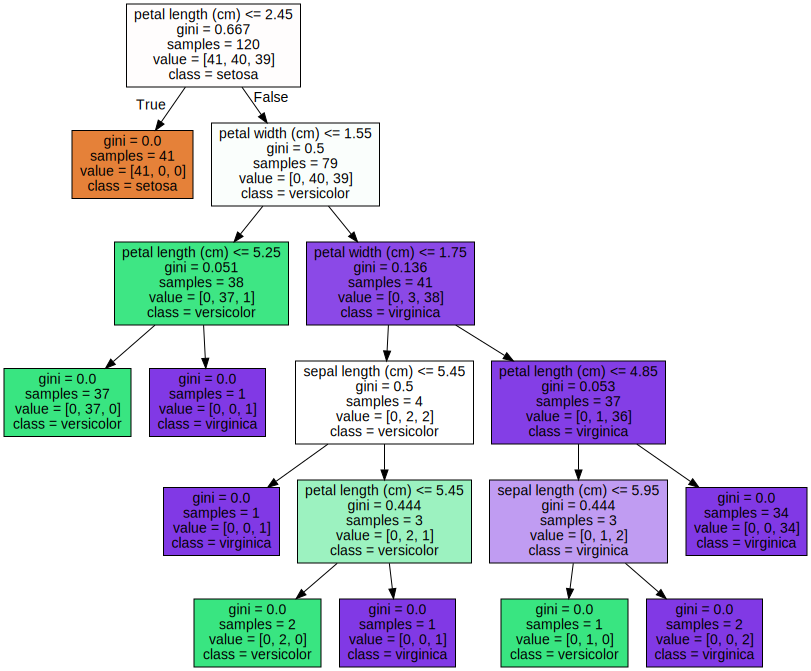

In [8]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree_dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

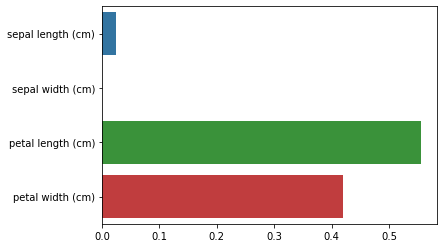

In [9]:
# 결정트리 알고리즘에서 중요도 추출
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
# feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

__결정 트리 과적합(Overfitting)__

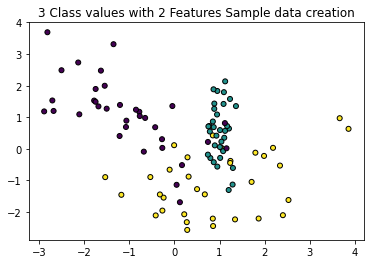

In [12]:
# 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수 제공
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k');

In [16]:
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습 . test
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    # np.linspace : 1차원의 배열 만들기, 그래프 그리기에서 수평축의 간격 만들기
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    # ravel() : 다차원 배열을 1차원 배열로 바꾸는 함수. 복사본을 생성하지 않음.
    # np.c_[] : 두 배열을 가로 방향(왼쪽에서 오른쪽으로 합치기)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행. (등고선 그리기)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,cmap='rainbow' ,zorder=1)

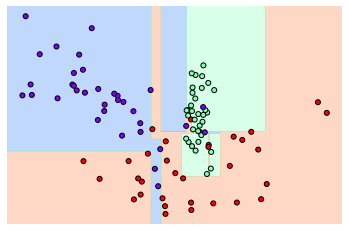

In [17]:
# 결정 기준 경계를 시각화
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

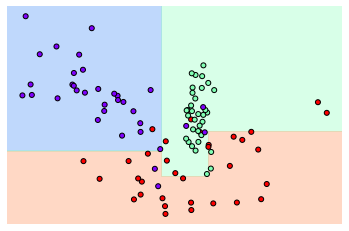

In [38]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 이상치에 크게 반응하지 않으면서 일반화된 분류 규칙에 따랍 분류됨.

__결정 트리 실습 - 사용자 행동 인식 데이터 셋__

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DF로 로드
feature_name_df = pd.read_csv('c:/data/human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [45]:
# 피처명을 가지고 있는 features.txt 파일은 중복된 피처명을 가지고 있어, 이를 DF로 로드하면 오류 발생. 
# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [10]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer') # 인덱스로 조인
    # 두번째 이상인 경우 _숫자로 추가되게 함
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1])
                                                                                             if x[1]>0 else x[0], axis=1) 
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [11]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep로 할당
    feature_name_df = pd.read_csv('c:/data/human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index','column_name'])
    
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터셋과 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('c:/data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('c:/data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩. 칼럼명은 action 적용
    y_train = pd.read_csv('c:/data/human_activity/train/y_train.txt', sep='\s+', header=None ,names=['action'])
    y_test = pd.read_csv('c:/data/human_activity/test/y_test.txt', sep='\s+', header=None ,names=['action'])
    
    # 로드된 학습/데이터용 DataFrame을 모두 반환
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [80]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [81]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [84]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6,8,10,12,16,20,24],
    'min_samples_split':[16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [86]:
# max_depth값에 따라어떻게 예측 성능이 변했는지 확인
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

# mean_test_score : 5개의 CV세트에서 검증용 데이터 셋의 정확도 평균 수치

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [88]:
# 별도의 테스트 데이터 셋에서 결정트리의 정확도 측정
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그떄마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [89]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝
params = {'max_depth' : [8,12,16,20],
         'min_samples_split' : [16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [90]:
# 최적 하이퍼 파라미터로 학습이 완료된 estimator 객체로 예측 수행
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


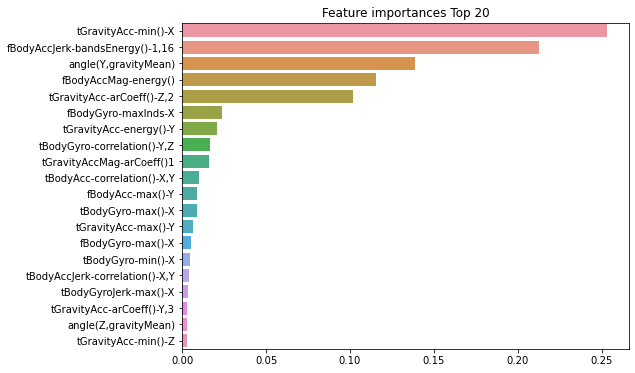

In [91]:
# 각 피처의 중요도 시각화
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 series로 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 앙상블 학습
여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
* __보팅(Voting)__ : 서로 다른 알고리즘을 가진 분류기를 결합
    - __하드 보팅__ : 다수결 원칙. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
    - __소프트 보팅__ : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정.
* __배깅(Bagging)__ : 각각의 분류기가 모두 같은 유형의 알고리즘 기반. 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행
* __부스팅(Boosting)__ : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게 가중치 부여.
* __스태킹(Stacking)__ : 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측

__보팅 분류기(Voting Classifier)__    
보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 셋 예측 분석

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


## 랜덤 포레스트
여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 함.    
랜덤 포레스트의 서브셋 데이터는 부트스트래핑(여러 개의 작은 데이터 셋을 임의로 만들어 개별 평균의 분포도를 측정. 중첩되게 분리함.)으로 데이터가 임의로 만들어짐. 그렇게 데이터가 중첩된 개별 데이터 셋에 결정 트리 분류기를 각각 적용.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DF 반환
X_train,X_Test,y_train,y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9196


__랜덤 포레스트 하이퍼 파라미터 및 튜닝__    
* __n_estimators__ : 랜덤 포레스트에서 결정 트리의 개수를 지정. 디폴트는 10개. 늘릴수록 좋은 성능을 기대할 수 있지만, 성능이 무조건 향상되는 건 아님. 또한 학습 수행 시간이 오래 걸리는 것도 감안해야 함.
* __max_features__ : 결정 트리의 max_features와 동일. default는 'auto' : sqrt(전체 피처 개수)
* __max_depth, min_samples_leaf, min_samples_split__ 결정트리의 파라미터가 동일하게 적용

In [14]:
# GridSearchCV를 이용해 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[8,16,24],
         'min_samples_leaf':[1,6,12],
         'min_samples_split':[2,8,16]}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1) #n_jobs=-1 : 모든 cpu코어를 이용해 학습 가능
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도:0.9165


In [16]:
# 최적 하이퍼 파라미터로 rancdomforest classifier 학습시킨 뒤 별도의 테스트 데이터셋에서 예측 성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                min_samples_split=2, random_state=0)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9260


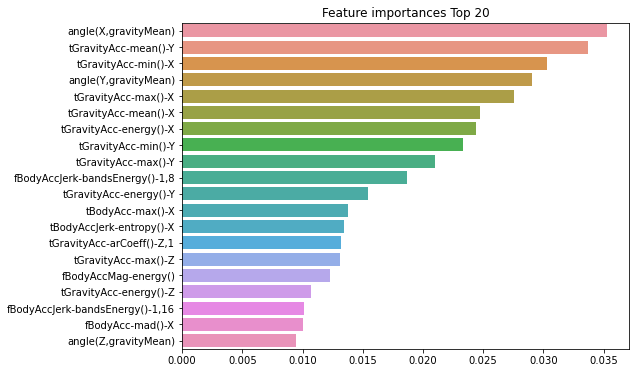

In [17]:
# 피처 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_Test,y_train,y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f} 초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 1081.6 초


GBM은 랜덤 포레스트보다 예측 성능이 조금 뛰어난 경우가 많음. 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요함. 

__GBM 하이퍼 파라미터__    
* __loss__ : 경사 하강법에서 사용할 비용 함수 지정. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용.
* __learning_rate__ : 학습을 진행할 때마다 적용하는 학습률로 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수. 0~1 사이의 값을 지정하며 기본값 = 0.1임. 너무 작은 값을 적용하면 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높지만, 수행 시간이 오래걸림. 반대로 큰 값을 적용하면 최소 오류값을 찾지 못하고 그냥 지나칠 수 있지만, 시간은 빠름.
* __n_estimators__ : weak learner의 개수. 순차적으로 오류를 보정하므로 개수가 많을 수록 예측 성능이 일정 수준까지 좋아질 수 있음. 개수가 많을수록 수행시간이 오래 걸림. learning_rate와 상호 보완적으로 사용함. learning_rate를 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음.
* __subsample__ : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값 = 1이고, 이는 전체 학습 데이터를 기반으로 학습한다는 의미. 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

## XGBoost(eXtra Gradient Boost)
* 뛰어난 예측 성능 : 분류와 회귀 영역에서 뛰어난 예측 성능
* GBM 대비 빠른 수행 시간 : 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능 보장.
* 과적합 규제 : 표준 GBM의 경우 과적합 규제 기능이 없으나 XGBoost는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성 가짐.
* 나무 가지치기 : max_depth로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득 없는 분할을 가지치기 해서 분할 수를 줄이는 장점이 있음.
* 자체 내장된 교차 검증 : 반복 수행 시마다 내부적으로 교차 검증을 수행해 최적화된 반복 수행 횟수를 가짐. 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능 있음.
* 결손값 자체 처리 : XGBoost는 결손값을 자체 처리할 수 있는 기능이 있음.
__하이퍼 파라미터__    
* 일반 파라미터 : 디폴트 파라미터 값을 바꾸는 경우는 거의 없음.
    - __booster__ : gbtree(tree base model) 또는 gblinear(linear model) 선택, 디폴트는 gbtree
    - __silent__ : 디폴트는 0. 출력 메시지를 나타내고 싶지 않을 때 1
    - __nthread__ : CPU의 실행 스레드 개수 조정. 디폴트는 CPU 전체 스레드를 다 사용하는 것.
* 부스터 파라미터
    - __eta[default=0.3,alias:learning_rate]__ : GBM의 learning_rate와 같은 파라미터. 보통은 0.01~0.2의 값 선호. 싸이킷런 래퍼 클래스의 경우 디폴트는 0.1
    - __num_boost_rounds__ : GBM의 n_estimators와 같은 파라미터
    - __min_child_weight[default=1]__ : 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 가중치 총합. 클수록 분할을 자제함. 과적합을 조절하기 위해 사용.
    - __gamma[default=0, alias: min_split_loss]__ : 트리의 리프노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우에 리프 노드 분리. 값이 클수록 과적합 감소 효과가 있음.
    - __max_depth[default=6]__ : 트리 기반 알고리즘의 max_depth와 같음. 0을 지정하면 깊이에 제한이 없음. 높을수록 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용.
    - __sub_sample[default=1]__ : GBM의 subsample과 동일. 일반적으로 0.5~1사이의 값 사용.
    - __colsample_bytree[default=1]__ : GBM의 max_feature와 유사함. 트리 생성에 필요한 피처를 임의로 샘플링 하는데 사용하여 과적합을 조정하는데 적용.
    - __lambda[default=1, alias:reg_lambda]__ : L2 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
    - __alpha[default=0, alias:reg_alpha]__ : L1 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
    - __scale_pos_weight[default=1]__ : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 셋의 균현을 유지하기 위한 파라미터
* 학습 태스크 파라미터
    - __objective__ : 최솟값을 가져야 할 손실 함수 정의. 
    - __binary:logistic__ : 이진 분류일 때 적용.
    - __multi:softmax__ : 다중 분류일 때 적용. 해당 손실함수를 적용할 경우 레이블 클래스 개수인 num_class 파라미터 지정해야 함.
    - __multi:softporb__ : 개별 레이블 클래스의 해당되는 예측 확률 반환
    - __eval_metric__ : 검증에 사용되는 함수 적용. 기본값은 회귀의 경우 rmse, 분류일 경우 error
    (rmse, mae, logloss, error, merror, mlogloss, auc)

__과적합 문제가 심각할 때__
- eta 값을 낮춤(0.01~0.1). num_round(n_estimators)는 반대로 높여줘야 함.
- max_depth 값을 낮춤.
- min_child_weight 값을 높임.
- gamma 값을 높임
- subsample과 colsample_bytree를 조정하는 것도 트리가 복잡하게 생성되는 것을 막아 과적합 문제에 도움.

In [1]:
import xgboost as xgb
print(xgb.__version__)

1.6.0


__파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측__

In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
# 레이블 값의 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 컬럼이 Lable임. Feature용 DataFrame은 cancer_df의 첫번째 컬럼에서 맨 마지막 두번째 컬럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(364, 30) (91, 30)


In [5]:
# XGBoost는 Dmatrix를 사용
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [6]:
params = {'max_depth':3, # 트리 최대 깊이
         'eta':0.05, # 학습률
         'objective':'binary:logistic', # 이진 분류이므로 이진 로지스특
         'eval_metric':'logloss'
         }
num_rounds = 400 # 부스팅 반복 횟수

In [9]:
# 조기 중단의 성능 평가는 별도의 검증 데이터 셋을 이용함. 이때 평가용 데이터 셋 지정과 eval_metric을 함꼐 설정
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기함.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')]만 명기해도 무방함.

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.64965	eval-logloss:0.65721
[1]	train-logloss:0.61035	eval-logloss:0.62496
[2]	train-logloss:0.57484	eval-logloss:0.59755
[3]	train-logloss:0.54165	eval-logloss:0.57116
[4]	train-logloss:0.51171	eval-logloss:0.54850
[5]	train-logloss:0.48304	eval-logloss:0.52579
[6]	train-logloss:0.45752	eval-logloss:0.50718
[7]	train-logloss:0.43269	eval-logloss:0.48616
[8]	train-logloss:0.40968	eval-logloss:0.46626
[9]	train-logloss:0.38902	eval-logloss:0.44961
[10]	train-logloss:0.36904	eval-logloss:0.43292
[11]	train-logloss:0.35044	eval-logloss:0.41685
[12]	train-logloss:0.33364	eval-logloss:0.40267
[13]	train-logloss:0.31734	eval-logloss:0.38927
[14]	train-logloss:0.30210	eval-logloss:0.37622
[15]	train-logloss:0.28746	eval-logloss:0.36444
[16]	train-logloss:0.27375	eval-logloss:0.35352
[17]	train-logloss:0.26117	eval-logloss:0.34391
[18]	train-logloss:0.24901	eval-logloss:0.33391
[19]	train-logloss:0.23785	eval-logloss:0.32509
[20]	train-logloss:0.22698	eval-logloss:0.31733
[2

65회의 logloss가 0.21470으로 가장 낮고, early_stopping_rounds를 50으로 설정해 50회 동안 logloss값이 향상되지 않았기 때문에 115회에서 멈춤.

In [10]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨.')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값을 결정하여 list 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨.
[0.979 0.023 0.686 0.141 0.985 0.996 0.996 0.995 0.994 0.005]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [15]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

def get_clf_eval(y_test,pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1, roc_auc))

In [22]:
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[34  3]
 [ 3 74]]
정확도:0.9474, 정밀도:0.9610, 재현율:0.9610, F1:0.9610, AUC:0.9912


In [23]:
# 싸이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                           eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [24]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도:0.9649, 정밀도:0.9620, 재현율:0.9870, F1:0.9744, AUC:0.9954


In [39]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr,y_tr),(X_val,y_val)] # 아의 튜플이 학습용 데이터, 뒤의 튜플이 검증용 데이터로 자동 인식
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50, eval_metric='logloss',eval_set=evals, verbose=True) 
#verbose=False or 0은 출력하지 않음

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.64965	validation_1-logloss:0.65721
[1]	validation_0-logloss:0.61035	validation_1-logloss:0.62496
[2]	validation_0-logloss:0.57484	validation_1-logloss:0.59755
[3]	validation_0-logloss:0.54165	validation_1-logloss:0.57116
[4]	validation_0-logloss:0.51171	validation_1-logloss:0.54850
[5]	validation_0-logloss:0.48304	validation_1-logloss:0.52579
[6]	validation_0-logloss:0.45752	validation_1-logloss:0.50718
[7]	validation_0-logloss:0.43269	validation_1-logloss:0.48616
[8]	validation_0-logloss:0.40968	validation_1-logloss:0.46626
[9]	validation_0-logloss:0.38902	validation_1-logloss:0.44961
[10]	validation_0-logloss:0.36904	validation_1-logloss:0.43292
[11]	validation_0-logloss:0.35044	validation_1-logloss:0.41685
[12]	validation_0-logloss:0.33364	validation_1-logloss:0.40267
[13]	validation_0-logloss:0.31734	validation_1-logloss:0.38927
[14]	validation_0-logloss:0.30210	validation_1-logloss:0.37622
[15]	validation_0-logloss:0.28746	validation_1-logloss:0.36444
[1

In [37]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 3 74]]
정확도:0.9561, 정밀도:0.9737, 재현율:0.9610, F1:0.9673, AUC:0.9923


In [40]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=10,eval_metric='logloss',eval_set=evals,verbose=0)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)
# early stopping을 50으로 설정할때보다 정확도가 더 낮음

오차 행렬
[[35  2]
 [ 4 73]]
정확도:0.9474, 정밀도:0.9733, 재현율:0.9481, F1:0.9605, AUC:0.9919


## LightGBM
XGBoost보다 학습에 걸리는 시간이 적고, 메모리 사용량도 상대적으로 적음. 단점은 적은 데이터 셋(일반적으로 10,000건 이하)에 적용할 경우 과적합이 발생하기 쉬움.    
리프 중심 트리 분할 방식으로 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성.

__LightGBM 하이퍼 파라미터__    
* 주요 파라미터 
    - __num_iterations[default=100,alias:n_estimators]__ : 반복 수행하려는 트리의 개수 지정. 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있음.
    - __learning_rate[default=0.1]__ : 0에서 1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값.
    - __max_depth[default=-1]__ : 0보다 작은 값을 지정하면 깊이에 제한이 없음. Leaf wise 기반으로 깊이가 상대적으로 더 깊음.
    - __min_data_in_leaf[default=20,alias:min_child_samples]__ : 결정 트리의 min_samples_leaf와 같음. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수, 과적합을 제어하기 위한 파라미터
    - __num_leaves[default=31]__ : 하나의 트리가 가질 수 있는 최대 리프 개수
    - __boosting[default=gbdt]__ : 부스팅의 트리를 생성하는 알고리즘. (gbdt:일반적인 그래디언트 부스팅 결정 트리/rf:랜덤포레스트)
    - __bagging_fraction[default=1.0, alias:subsample]__ : 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정.
    - __feature_fraction[default=1.0,alias:colsample_bytree]__ : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. 과적합을 막기 위해 사용됨.
    - __lambda_l2[default=0.0,alias:reg_lambda]__ : L2 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
    - __lambda_l1[default=0.0,alias:reg_alpha]__ : L1 Regularization 적용 값. L2와 마찬가지로 과적합 제어를 위한 것.
* 학습 태스크 파라미터
    - __objective__ : 최솟값을 가져야 할 손실 함수 정의. 
    
__하이퍼 파라미터 튜닝 방안__    
- num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델의 복잡도가 커져 과적합 영향도가 커짐.
- min_data_in_leaf(min_child_samples)는 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지함.
- max_depth는 명시적으로 깊이의 크기를 제한함. num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는 데 사용.
- learning_rate를 작게 하면서 n_estimators를 크게 함. 이 때, n_estimators를 너무 크게 하면 과적합으로 성능 저하될 수 있음.

__LightGBM 적용-위스콘신 유방암 예측__

In [41]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']=dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr, y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50,eval_metric='logloss',eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.618281	valid_1's binary_logloss: 0.657219
[2]	training's binary_logloss: 0.581501	valid_1's binary_logloss: 0.623193
[3]	training's binary_logloss: 0.547162	valid_1's binary_logloss: 0.591294
[4]	training's binary_logloss: 0.517044	valid_1's binary_logloss: 0.564012
[5]	training's binary_logloss: 0.488875	valid_1's binary_logloss: 0.540575
[6]	training's binary_logloss: 0.462743	valid_1's binary_logloss: 0.515623
[7]	training's binary_logloss: 0.438946	valid_1's binary_logloss: 0.496285
[8]	training's binary_logloss: 0.416626	valid_1's binary_logloss: 0.476931
[9]	training's binary_logloss: 0.396256	valid_1's binary_logloss: 0.460624
[10]	training's binary_logloss: 0.377452	valid_1's binary_logloss: 0.445433
[11]	training's binary_logloss: 0.359003	valid_1's binary_logloss: 0.428638
[12]	training's binary_logloss: 0.342203	valid_1's binary_logloss: 0.41445
[13]	training's binary_logloss: 0.327155	valid_1's binary_logloss: 0.4017
[14]	training's binary_l

In [46]:
get_clf_eval(y_test,preds,pred_proba)

오차 행렬
[[33  4]
 [ 3 74]]
정확도:0.9386, 정밀도:0.9487, 재현율:0.9610, F1:0.9548, AUC:0.9898


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

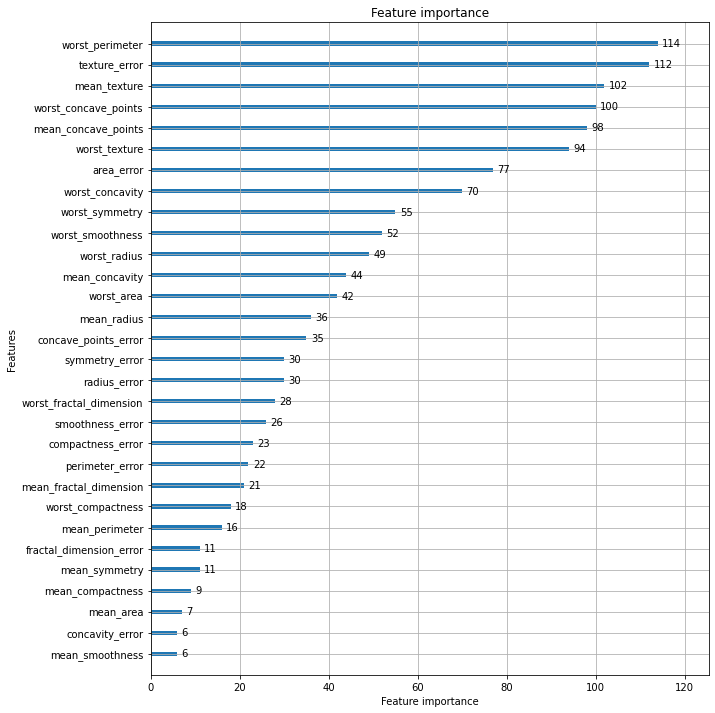

In [50]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

## 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝
GridSearch 방식을 이용할 때에는 하이퍼 파라미터 최적화 시간 때문에 많은 시간이 소모됨. 그에 대한 대체 방안이 베이지안 최적화 기법.
1. 최초에는 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과를 관측함.
2. 관측된 값을 기반으로 대체 모델은 최적 함수를 추정함. 최적 관측값은 y축 value에서 가장 높은 값을 가질 때의 하이퍼 파라미터
3. 획득함수는 다음으로 관측할 하이퍼 파라미터 값을 계산함. 이전의 최적 관측값보다 더 큰 최댓값을 가질 가능성이 높은 지점을 찾아서 다음에 관측할 하이퍼 파라미터를 대체 모델에 전달함.
4. 획득함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되어 다시 최적 함수를 예측 추정

__HyperOpt 사용하기__

In [52]:
# 입력 변수명과 입력값의 검색 공간 설정
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정
search_space = {'x':hp.quniform('x',-10,10,1), 'y':hp.quniform('y',-15,15,1)}

* hp.quniform(label,low,high,q) : label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정.
* hp.uniform(label,low,high) : 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정.
* hp.randint(label,upper) : 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정.
* hp.loguniform(label,low,high) : exp(uniform(low,high))값을 반환하며, 반환 값의 log 변환 된 값은 정규 분포 형태를 가지는 검색 공간 설정.
* hp.choice(label,options) : 검색값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion',['gini','entropy'])와 같이 설정하면 입력변수  tree_criterion값을 gini와 entropy로 설정하여 입력함.

In [54]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

__fmin 함수 제공__    
* fn: 위에서 생성한 objective_func와 같은 목적 함수.
* space : 위에서 생성한 search_space와 같은 검색 공간 딕셔너리.
* algo : 베이지안 최적화 적용 알고리즘. 기본적으로 tpe.suggest(TPE : Tree of Parzen Estimator 의미)
* max_evals : 최적 입력값을 찾기 위한 입력값 시도 횟수.
* trials : 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용. Trials 클래스를 객체로 생성한 변수명을 입력.
* rstate : fmin을 수행할 때마다 동일한 결괏값을 가질 수 있도록 설정하는 랜덤 시드 값.

In [55]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 412.61trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [60]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
              trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:',best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 550.33trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [63]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [64]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [67]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 리스트로 생성
losses = [i['loss'] for i in trial_val.results]

# DataFrame으로 생성
result_df = pd.DataFrame({'x':trial_val.vals['x'],'y':trial_val.vals['y'],'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


__HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화__    
주의해야 할 부분 : 특정 하이퍼 파라미터들은 정숫값만 입력을 받는데 HyperOpt는 입력값과 반환값이 모두 실수형이기 떄문에 하이퍼 파라미터 입력 시 형변환을 해줘야 함. 그리고 HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야해서 성능값이 클수록 좋은 성능 지표일 경우 -1을 곱해줘야 함.

In [69]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from hyperopt import hp
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

# 유방암 데이터 중 80%는 학습용, 20%는 테스트용
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=156)

# 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=156)

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth':hp.quniform('max_depth',5,20,1),
                   'min_child_weight':hp.quniform('min_child_weight',1,2,1),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                   'colsample_bytree':hp.uniform('colsample_bytree',0.5,1),}

In [72]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           learning_rate=int(search_space['learning_rate']),
                           colsample_bytree=search_space['colsample_bytree'],
                           eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf,X_train,y_train,scoring='accuracy',cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1*np.mean(accuracy),'status':STATUS_OK}

In [73]:
# 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=50, # 최대 반복 횟수를 지정
           trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:',best)

100%|███████████████████████████████████████████████| 50/50 [00:08<00:00,  5.70trial/s, best loss: -0.3846142674567213]
best: {'colsample_bytree': 0.5852347138193622, 'learning_rate': 0.033687779759699644, 'max_depth': 19.0, 'min_child_weight': 2.0}


In [74]:
# 정수형 하이퍼 파라미터는 정수형으로 형 변환, 실수형 하이퍼 파라미터는 소수점 5자리까지만 변환
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'],5), round(best['learning_rate'],5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.58523, learning_rate:0.03369, max_depth:19, min_child_weight:2


In [75]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                           learning_rate=round(best['learning_rate'],5),
                           max_depth=int(best['max_depth']),
                           min_child_weight=int(best['min_child_weight']),
                           colsample_bytree=round(best['colsample_bytree'],5))
evals = [(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50, eval_metric='logloss',
               eval_set=evals, verbose=True)
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,preds,pred_proba)

[0]	validation_0-logloss:0.66460	validation_1-logloss:0.66902
[1]	validation_0-logloss:0.63717	validation_1-logloss:0.64749
[2]	validation_0-logloss:0.61177	validation_1-logloss:0.62491
[3]	validation_0-logloss:0.58746	validation_1-logloss:0.60568
[4]	validation_0-logloss:0.56525	validation_1-logloss:0.58838
[5]	validation_0-logloss:0.54361	validation_1-logloss:0.57055
[6]	validation_0-logloss:0.52347	validation_1-logloss:0.55277
[7]	validation_0-logloss:0.50466	validation_1-logloss:0.53890
[8]	validation_0-logloss:0.48656	validation_1-logloss:0.52473
[9]	validation_0-logloss:0.46917	validation_1-logloss:0.50979
[10]	validation_0-logloss:0.45261	validation_1-logloss:0.49609
[11]	validation_0-logloss:0.43710	validation_1-logloss:0.48397
[12]	validation_0-logloss:0.42238	validation_1-logloss:0.47216
[13]	validation_0-logloss:0.40829	validation_1-logloss:0.46179
[14]	validation_0-logloss:0.39455	validation_1-logloss:0.45064
[15]	validation_0-logloss:0.38150	validation_1-logloss:0.43999
[1

[130]	validation_0-logloss:0.03829	validation_1-logloss:0.21889
[131]	validation_0-logloss:0.03796	validation_1-logloss:0.21871
[132]	validation_0-logloss:0.03763	validation_1-logloss:0.21889
[133]	validation_0-logloss:0.03723	validation_1-logloss:0.21859
[134]	validation_0-logloss:0.03690	validation_1-logloss:0.21793
[135]	validation_0-logloss:0.03652	validation_1-logloss:0.21855
[136]	validation_0-logloss:0.03621	validation_1-logloss:0.21874
[137]	validation_0-logloss:0.03591	validation_1-logloss:0.21917
[138]	validation_0-logloss:0.03564	validation_1-logloss:0.21948
[139]	validation_0-logloss:0.03534	validation_1-logloss:0.21886
[140]	validation_0-logloss:0.03505	validation_1-logloss:0.21825
[141]	validation_0-logloss:0.03477	validation_1-logloss:0.21810
[142]	validation_0-logloss:0.03446	validation_1-logloss:0.21851
[143]	validation_0-logloss:0.03419	validation_1-logloss:0.21838
[144]	validation_0-logloss:0.03393	validation_1-logloss:0.21889
[145]	validation_0-logloss:0.03364	valid

## 분류 실습 - 캐글 산탄데르 고객 만족 예측
__데이터 전처리__

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('c:/data/train_santander.csv',encoding='latin-')
print('dataset shape:',cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
cust_df.info()
# 111개의 피처가 float 형, 260개의 피처가 int형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
# var3의 -999999값을 NaN이나 특정 예외 값으로 변환했을 것임
print(cust_df.var3.value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# -999999을 가장 값이 많은 2로 변환 / ID피처는 단순 식별자임으로 삭제
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [7]:
# 비대칭한 데이터 셋으로 클래스인 Target 분포도가 비슷하게 추출됐는지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('\n 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)

 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [8]:
# early stopping의 검증 데이터 셋으로 사용하기 위해 학습 데이터를 쪼개 다시 학습과 검증 데이터 셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

__XGBoost 모델 학습과 하이퍼 파라미터 튜닝__

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81004
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90457	validation_1-auc:0.83346
[150]	validation_0-auc:0.90465	validation_1-auc:0.83343
[151]	validation_0-auc:0.90469	validation_1-auc:0.83344
[152]	validation_0-auc:0.90482	validation_1-auc:0.83342
[153]	validation_0-auc:0.90501	validation_1-auc:0.83339
[154]	validation_0-auc:0.90513	validation_1-auc:0.83336
[155]	validation_0-auc:0.90518	validation_1-auc:0.83334
[156]	validation_0-auc:0.90525	validation_1-auc:0.83331
[157]	validation_0-auc:0.90531	validation_1-auc:0.83339
[158]	validation_0-auc:0.90549	validation_1-auc:0.83330
[159]	validation_0-auc:0.90559	validation_1-auc:0.83331
[160]	validation_0-auc:0.90574	validation_1-auc:0.83342
[161]	validation_0-auc:0.90592	validation_1-auc:0.83339
[162]	validation_0-auc:0.90598	validation_1-auc:0.83340
[163]	validation_0-auc:0.90601	validation_1-auc:0.83340
[164]	validation_0-auc:0.90629	validation_1-auc:0.83337
[165]	validation_0-auc:0.90641	validation_1-auc:0.83333
[166]	validation_0-auc:0.90652	validation_1-auc:

In [10]:
from hyperopt import hp

# 하이퍼 파라미터 검색 공간 설정
# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1 간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth':hp.quniform('max_depth',5,15,1),
                   'min_child_weight':hp.quniform('min_child_weight',1,6,1),
                   'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

In [11]:
# 목적 함수 생성
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환.
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                           min_child_weight=int(search_space['min_child_weight']),
                           colsample_bytree=search_space['colsample_bytree'],
                           learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 셋 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=30,eval_metric='auc',
                   eval_set=[(X_tr,y_tr),(X_val,y_val)], verbose=False)
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음.
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

In [13]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
           space=xgb_search_space,
           algo=tpe.suggest,
           max_evals=5, # 최대 반복 횟수 지정 : 50회를 속도 떄문에 5로 수정함
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:',best)

100%|█████████████████████████████████████████████████| 5/5 [03:07<00:00, 37.51s/trial, best loss: -0.8358993926439547]
best: {'colsample_bytree': 0.753532317468581, 'learning_rate': 0.08326583869166816, 'max_depth': 6.0, 'min_child_weight': 2.0}


In [15]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'],5),
                       max_depth=int(best['max_depth']),
                       min_child_weight=int(best['min_child_weight']),
                       colsample_bytree=round(best['colsample_bytree'],5))

# evaluation metirc을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)],verbose=0)

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8446


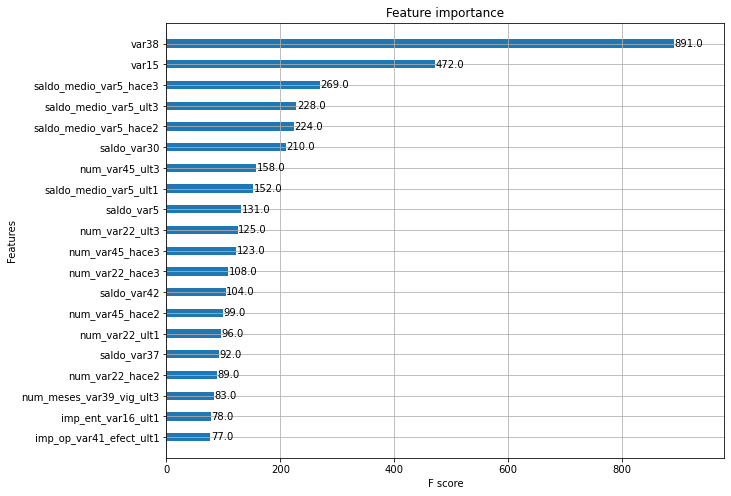

In [16]:
# 피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4);

__LightGBM 모델 학습과 하이퍼 파라미터 튜닝__

In [17]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr,y_tr),(X_val,y_val)]
lgbm_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',eval_set=eval_set,verbose=0)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8384


In [18]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves',32,64,1),
                    'max_depth':hp.quniform('max_depth',100,160,1),
                    'min_child_samples':hp.quniform('min_child_samples',60,100,1),
                    'subsample':hp.uniform('subsample',0.7,1),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

In [19]:
# 목적 함수 생성
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 LGBMClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환.
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100, 
                             num_leaves=int(search_space['num_leaves']),
                             max_depth=int(search_space['max_depth']),
                           min_child_samples=int(search_space['min_child_samples']),
                           subsample=search_space['subsample'],
                           learning_rate=search_space['learning_rate'])
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 셋 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 LGBMClassifier 학습 수행
        lgbm_clf.fit(X_tr,y_tr,early_stopping_rounds=30,eval_metric='auc',
                   eval_set=[(X_tr,y_tr),(X_val,y_val)], verbose=False)
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

In [20]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
           space=lgbm_search_space,
           algo=tpe.suggest,
           max_evals=5, # 최대 반복 횟수 지정 : 50회를 속도 떄문에 5로 수정함
           trials=trials, rstate=np.random.default_rng(seed=30))

print('best:',best)

100%|█████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/trial, best loss: -0.8348176231653449]
best: {'learning_rate': 0.02347777899863792, 'max_depth': 134.0, 'min_child_samples': 75.0, 'num_leaves': 34.0, 'subsample': 0.7754775757159653}


In [24]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                         learning_rate=round(best['learning_rate'],5),
                       max_depth=int(best['max_depth']),
                       min_child_samples=int(best['min_child_samples']),
                       subsample=round(best['subsample'],5))

# evaluation metirc을 auc로, early stopping은 100으로 설정하고 학습 수행
lgbm_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)],verbose=0)

lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8425


## 분류실습-캐글 신용카드 사기 검출
레이블이 불균형한 분포를 가진 데이터 셋을 학습시킬 때 예측 성능의 문제가 발생할 수 있음. 이 때 사용하는 방법이 오버 샘플링과 언더 샘플링
* 언더 샘플링(Undersampling) : 많은 데이터 셋을 적은 데이터 셋 수준으로 감소시키는 방식. 너무 많은 데이터를 감소시켜 제대로 된 학습을 수행할 수 없는 문제가 발생할 수도 있음.
* 오버 샘플링(Oversamplit) : 적은 데이터를 단순히 증식하는 게 아닌, 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식. 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique:적은 데이터 셋에 있는 개별 데이터들의 KNN을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성) 방법이 있음.

__데이터 일차 가공 및 모델 학습/예측/평가__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('c:/data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [39]:
print('정상 데이터 비율:',card_df.Class.value_counts()[0]/card_df.Class.value_counts().sum())
print('사기 데이터 비율:',card_df.Class.value_counts()[1]/card_df.Class.value_counts().sum())

정상 데이터 비율: 0.9982725143693799
사기 데이터 비율: 0.001727485630620034


In [10]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 셋 반환 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    # train_test_split() 으로 학습과 테스트 데이터 분할. stratify=y_target으로 레이블 값 분포도 서로 동일하게 만듦
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0,
                                                       stratify=y_target)
    # 학습과 테스트 데이터 셋 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [11]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('\n테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64

테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [12]:
# 로지스틱 회귀를 이용한 사기 여부 예측 
from sklearn.linear_model import LogisticRegression
def get_clf_eval(y_test,pred=None, pred_proba=None):
    from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1, roc_auc))
    
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차 행렬
[[85281    14]
 [   57    91]]
정확도:0.9992, 정밀도:0.8667, 재현율:0.6149, F1:0.7194, AUC:0.9703


In [13]:
# 인자로 사이킷런의 Estimator객체와 학습/테스트 데이터 셋을 입력받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba)

In [14]:
# LightGBM으로 모델 학습한 뒤 별도의 테스트 데이터 셋으로 예측 평가 수행
# 불균형한 분포를 이루는 경우 boost_from_average=False로 파라미터 설정해야 성능 향상 가능
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train,X_test,y_train,y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1:0.8453, AUC:0.9790


__데이터 분포도 변환 후 모델 학습/예측/평가__    
중요 피처 값의 분포도를 살펴봅니다. 로지스틱 회귀는 선형 모델로 중요 피처들의 값이 정규 분포 형태를 유지하는 것을 선호함. Amount 피처는 신용카드 사용 금액으로 정상/사기 트랜잭션 결정에 매우 중요한 속성일 가능성이 높으므로 Amount 피처의 분포도를 확인함.

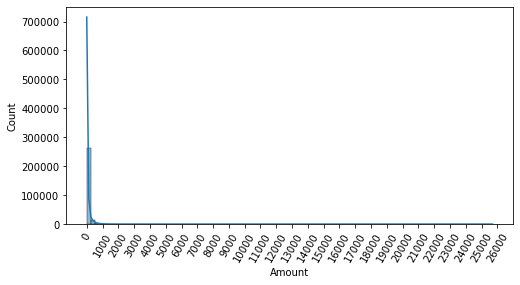

In [15]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.histplot(card_df['Amount'],bins=100, kde=True)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 DF 맨 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_scaled',amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy

In [17]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도:0.9992, 정밀도:0.8654, 재현율:0.6081, F1:0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도:0.9995, 정밀도:0.9569, 재현율:0.7500, F1:0.8409, AUC:0.9779


In [18]:
# 로그 변환 수행 : 데이터 분포도가 심하게 왜곡되어 있을 경우
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 넘파이의 log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_scaled',amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy

In [19]:
# Amount를 로그 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도:0.9992, 정밀도:0.8812, 재현율:0.6014, F1:0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도:0.9995, 정밀도:0.9576, 재현율:0.7635, F1:0.8496, AUC:0.9796


__이상치 데이터 제거 후 모델 학습/예측/평가__    
이상치는 전체 데이터 패턴에서 벗어난 이상 값을 가진 데이터. 여러 방법 중 IQR(Inner Quantile Range)방식을 적용하는 경우 사분위 값의 편차를 이용하며, 박스 플롯으로 시각화 가능.

<AxesSubplot:>

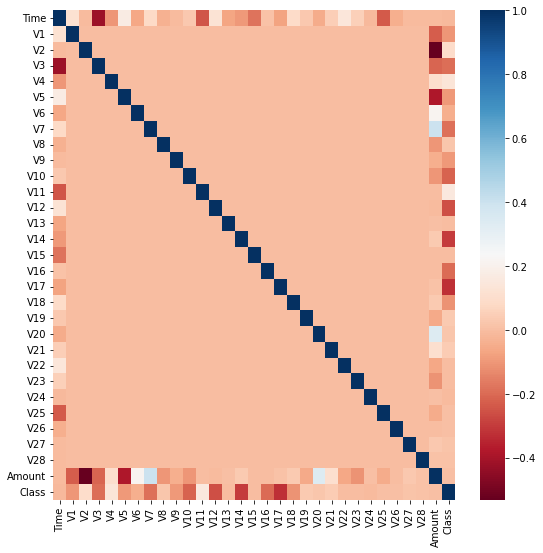

In [20]:
# 결정값과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋으므로, 피처별로 상관도를 시각화하여 확인함.
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [21]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values,25)
    quantile_75 = np.percentile(fraud.values,75)
    
    # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame Index 반환
    outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

In [22]:
# get_outlier 함수를 이용해 v14컬럼에서 이상치 데이터 찾기
outlier_index = get_outlier(df=card_df,column='V14',weight=1.5)
print('이상치 데이터 인덱스:',outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [23]:
# 로그 변환 후 v14 피처의 이상치 데이터 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy,column='V14',weight=1.5)
    df_copy.drop(outlier_index,axis=0,inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도:0.9993, 정밀도:0.8750, 재현율:0.6712, F1:0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도:0.9996, 정밀도:0.9603, 재현율:0.8288, F1:0.8897, AUC:0.9780


__SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가__    
SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링 해야함.

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ',X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ',X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n',pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포:
 0    199020
1    199020
Name: Class, dtype: int64


In [26]:
# 로지스틱 회귀 모델 학습 후 성능 평가
lr_clf = LogisticRegression(max_iter=1000)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도:0.9723, 정밀도:0.0542, 재현율:0.9247, F1:0.1023, AUC:0.9737


재현율은 크게 증가했지만 정밀도는 5.4%로 급격하게 저하됨. 로지스틱 회귀 모델이 오버 샘플링으로 실제 원본 데이터의 유형보다 너무나 많은 class=1 데이터를 학습하면서 실제 테스트 데이터 셋에서 예측을 지나치게 class=1로 적용해 정밀도가 떨어진 것.

In [29]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    from sklearn.metrics import precision_recall_curve, roc_curve
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    %matplotlib inline
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

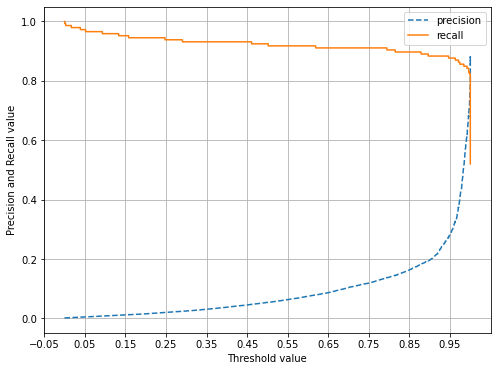

In [30]:
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])
'''임곗값이 0.99이하에서는 재현율이 매우 좋고 정밀도가 극단적으로 낮다가
0.99 이상에서는 반대로 됨. 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없음.
'''

In [31]:
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf,X_train_over,X_test,y_train_over,y_test)
'''SMOTE를 적용하면 재현율은 높아지나, 정밀도는 낮아지는 것이 일반적임.
재현율 지표를 높이는 것이 머신러닝 모델의 주요한 목표인 경우 smote를 적용하면 좋음.
좋은 SMOTE 패키지일수록 재현율 증가율은 높이고 정밀도 감소율은 낮출 수 있도록 효과적으로 데이터를 증식
'''

오차 행렬
[[85283    12]
 [   22   124]]
정확도:0.9996, 정밀도:0.9118, 재현율:0.8493, F1:0.8794, AUC:0.9814


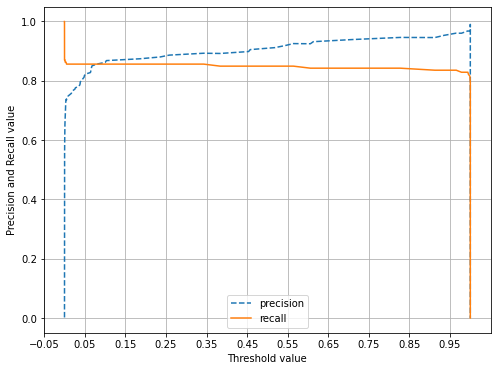

In [32]:
precision_recall_curve_plot(y_test,lgbm_clf.predict_proba(X_test)[:,1])

## 스태킹 앙상블
개별 알고리즘의 예측 결과 데이터 셋을 최종적인 메타 데이터 셋으로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식.(메타 모델)    

__기본 스태킹 모델__

In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [2]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 셋을 학습, 예측할 최종 모델
lr_final = LogisticRegression()

In [3]:
# 개별 모델을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [4]:
# 개별 알고리즘으로부터 예측된 예측값을 컬럼 레벨로 옆으로 붙여서 피처 값으로 만들어 최종 메타 모델에서 학습 데이터로 다시 사용
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

# 최종 메타 모델인 로지스틱 회귀 학습 및 정확도 측정
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메탈 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

(4, 114)
(114, 4)
최종 메탈 모델의 예측 정확도: 0.9737


개별 모델 정확도보다 향상되었지만, 스태킹 기법이 무조건 개별 모델보다 좋아진다는 보장이 없음.

__CV 세트 기반의 스태킹__    
과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 셋을 만들 때 교차 검증 기반으로 예측된 결과 데이터 셋을 이용.    
1. 각 모델 별로 N개의 폴드로 나누고, N-1개의 폴드로 학습을, 1개의 검증폴드로 데이터를 예측하고 그 결과를 저장함. 그 예측값들의 평균으로 최종 결괏값을 생성하고 이를 메타 모델을 위한 테스트 데이터로 이용.
2. 각 모델들의 생성한 데이터를 모두 합쳐서 최종적으로 메타 모델이 사용할 학습 데이터와 테스트 데이터 생성. 그 후에 최종 학습 데이터와 원본 데이터의 레이블 데이터를 합쳐서 메타 모델 학습 -> 최종 테스트 데이터로 예측 수행 -> 원본 테스트 데이터의 레이블 데이터와 최종 예측결과 비교 후 평가

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,'model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/ 예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [17]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [18]:
# 반환된 각 모델별 학습 데이터와 테스트 데이터를 합치기만 하면 됨. 넘파이의 concatenate()를 이용
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:',Stack_final_X_train.shape,
     '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [22]:
lr_final.fit(Stack_final_X_train,y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test,stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


# Ch 05. 회귀
주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것    
지도 학습에서 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고, 회귀는 연속형 숫자 값.

## 단순 선형 회귀
독립변수와 종속변수 모두 하나인 선형 회귀.    
실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 함. 최적의 회귀 모델은 잔차 합이 최소가 되는 모델을 의미함.    
오류 합을 계산할 때는 MAE(절대값을 취해서 더함), RSS(오류 값의 제곱을 구해서 더함)    
RSS는 비용(Cost)이며, 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구함. 비용 함수를 손실 함수라고도 함.

## 비용 최소화하기-경사 하강법
반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W파라미터를 지속해서 보정해 나감.

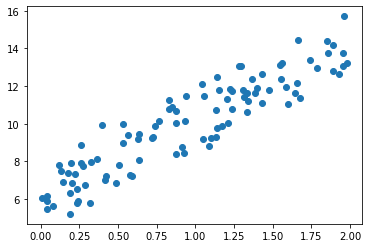

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1) # [0,1) 0은 들어가지만 1은 들어가지 않는 균등분포로부터 샘플을 추출하여 배열 반환. 음수 값이 나올 수 없음.
y = 6 + 4 * X+np.random.randn(100,1) # 표준 정규 분포 (N(0,1)) 에서 추출한 샘플을 리턴. 음수의 값이 나올 수 있음.

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [31]:
# 실제 y값과 예측된 y값을 인자로 받아서 1/N∑(실제값-예측값)^2 을 계산해 반환
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [37]:
# w1과 w0를 업데이트할 w1_update, w0_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트 할 w1_updeate와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [40]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용
def gradient_descent_steps(X,y,iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0-w0_update
        
    return w1, w0

In [41]:
# 경사 하강법의 예측 오류 계산
w1, w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


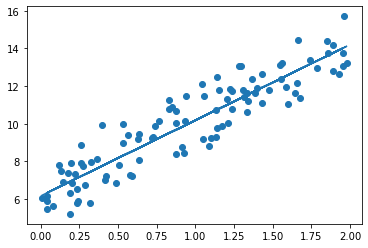

In [65]:
plt.scatter(X,y)
plt.plot(X,y_pred)

경사 하강법은 모든 학습데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 하기 때문에 수행 시간이 매우 오래 걸린다는 단점.    
그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용함.이는 일부 데이터만 이용해 w가 업데이트되는 값을 계산해서 비교적 빠른 속도를 보장함. 대용량의 데이터의 경우 대부분 확률적 경사 하강법 또는 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출함.

In [71]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind) #np.seed 설정
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0]) 
        '''np.random.permutation : 기존 배열은 냅두고, 순서를 랜덤하게 섞은 배열 객체를 새로 생성
        np.random.shuffle : 기존 배열의 순서를 변경'''
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [ ]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:',round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]* X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
__LinearRegression 클래스 - Ordinary Least Squares__ : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스.
```
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
```
* 입력 파라미터
    - __fit_intercept__ : 불린 값으로, 디폴트는 True. 절편값을 계산할 것인지 지정함. False로 지정시 0으로 지정됨.
    - __normalize__ : 불린 값으로 디폴트는 False. True이면 회귀를 수행하기 전 입력 데이터 셋을 정규화함.(fit_intercept가 false인 경우 이 파라미터 무시됨.

* 속성
    - __coef__ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. shape는 (Target값 개수, 피처 개수)
    - __intercept__ : intercept값
    
__회귀 평가 지표__    
* __MAE__ : Mean Absolute Error이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것.
* __MSE__ : Mean Squared Error이며 실제 값과 예측값의 차이를 제곱해 평균한 것
* __RMSE__ : MSE 값은 오류의 제곱을 구해 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 것
* __R^2__ : 분산기반으로 예측 성능을 평가. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음.

__보스턴 주택 가격 회귀 구현__

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가겨. 이를 price 칼럼으로 DF에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :',bostonDF.shape)
print('Null값의 크기: ',bostonDF.isnull().sum().sum())
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)
Null값의 크기:  0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


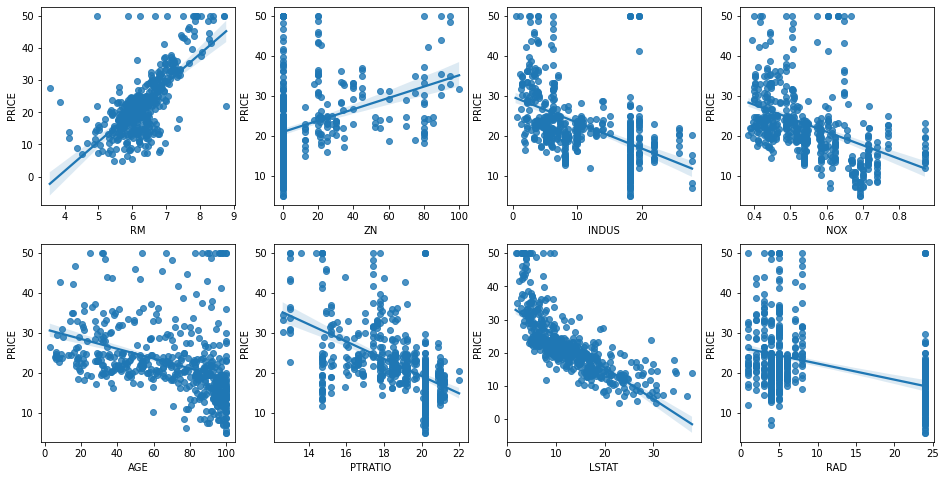

In [77]:
# 2개의 행과 4개의 열을 가지 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig,axs = plt.subplots(figsize=(16,8),ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

RM은 양방향의 선형성. LSTAT는 음방향의 선형성이 큼.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [90]:
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

절편 값: 40.99559517216444
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [91]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [95]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squred_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 folds 의 개별 RSME scores: ',np.round(rmse_scores,2))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RSME scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829


## 다항 회귀와 과대적합/과소적합 이해
__다항 회귀__    
다항회귀도 선형 회귀임. 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 여부

In [96]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr) #[1,x1,x2,x1^2,x1x2,x2^2]

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [99]:
# 3차 다항식의 결정 함수식을 y=1 + 2x1 + 3x1^2 + 4x2^3으로 설정
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [100]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape :',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 # x1 = X[:,0] / x2 = x[:,1]
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),
                 ('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


__다항 회귀를 이용한 과소적합 및 과적합 이해__    
원래 데이터 세트는 피처 X와 target y 가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어줌. 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교

In [106]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.rand(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.52]입니다.
Degree 1 MSE는 0.3855980524675215입니다.

Degree 4 회귀 계수는 [  1.74 -22.98  31.58 -11.24]입니다.
Degree 4 MSE는 0.005719308263122512입니다.

Degree 15 회귀 계수는 [ 1.20140000e+02 -3.59877000e+03  5.21456400e+04 -4.14487380e+05
  1.80876311e+06 -3.38029480e+06 -6.02554528e+06  5.58407528e+07
 -1.69821186e+08  3.08621704e+08 -3.68958383e+08  2.93841862e+08
 -1.50693784e+08  4.51469375e+07 -6.01500512e+06]입니다.
Degree 15 MSE는 42855574.41460031입니다.


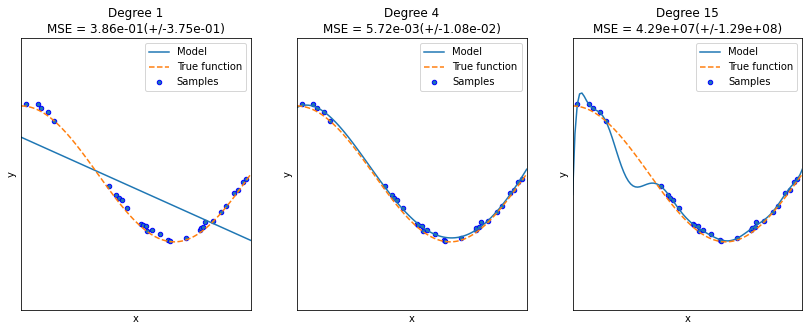

In [108]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                        ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    # pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test),'--',label='True function') # y= 코사인 변환값
    plt.scatter(X,y,edgecolor='b',s=20,label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

Degree 1은 단순 선형 회귀와 동일    
Degree 4는 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 됨.    
Degree 15는 과적합이 심한 모델